In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source_path = '../../../fb_2022'

In [3]:
var = pd.read_csv(os.path.join(source_path, 'fb_2022_adid_var_sets_072124.csv.gz'))

/tmp/ipykernel_4762/1101205232.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  var = pd.read_csv(os.path.join(source_path, 'fb_2022_adid_var_sets_072124.csv.gz'))


In [4]:
# Set3
var = var.loc[var.set3 == 1]

In [5]:
text = pd.read_csv(os.path.join(source_path, 'fb_2022_adid_text.csv.gz'))

In [6]:
var = var.merge(text, how='left', on='ad_id')

In [8]:
var.columns

Index(['ad_id', 'page_id', 'ad_creation_time', 'ad_delivery_start_time',
       'ad_delivery_stop_time', 'spend', 'impressions', 'region_distribution',
       'demographic_distribution', 'publisher_platforms', 'potential_reach',
       'from_pd_id', 'wmp_media_type', 'aws_face_vid', 'aws_face_img',
       'sub_bucket', 'race_of_focus', 'race_of_focus_region_pct',
       'ad_tone_constructed', 'ad_tone_mentionbased', 'goal_DONATE_prediction',
       'goal_DONATE_predicted_prob', 'goal_CONTACT_prediction',
       'goal_CONTACT_predicted_prob', 'goal_PURCHASE_prediction',
       'goal_PURCHASE_predicted_prob', 'goal_GOTV_prediction',
       'goal_GOTV_predicted_prob', 'goal_EVENT_prediction',
       'goal_EVENT_predicted_prob', 'goal_POLL_prediction',
       'goal_POLL_predicted_prob', 'goal_GATHERINFO_prediction',
       'goal_GATHERINFO_predicted_prob', 'goal_LEARNMORE_prediction',
       'goal_LEARNMORE_predicted_prob', 'goal_PRIMARY_PERSUADE_prediction',
       'goal_PRIMARY_PERSUADE_

In [10]:
'''''
Regression table: WMP Set 3 (sponsor-media level)
'''''
df = pd.read_csv("../input_data/fb_regression_table_for_descriptives.csv")

In [11]:
df.columns

Index(['pd_id', 'wmp_media_type', 'cid', 'num_unique', 'AverageSimilarity',
       'std', 'log_estimated_cost', 'race_competitiveness', 'image', 'party',
       'group', 'other_sponsor_type', 'Democratic', 'third_party', 'senate',
       'candidate'],
      dtype='object')

In [12]:
len(df.pd_id.unique()) # All unique sponsors

2218

In [13]:
len(df.dropna(subset='log_estimated_cost').pd_id.unique()) # Number of sponsors who invested in TV ads

333

In [14]:
df_cand = df[df.candidate == 1]
print(df_cand.shape)

(1017, 16)


In [16]:
df.AverageSimilarity.mean()

0.8039394839422309

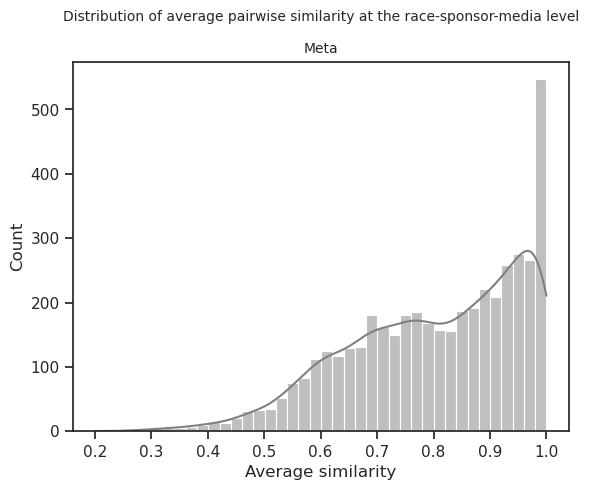

In [17]:
# DV
sns.set_theme(style='ticks', palette="tab10")

g = sns.histplot(df.AverageSimilarity, kde=True, bins=40, color='gray', line_kws={'color': 'gray'})

g.set(title='Distribution of average pairwise similarity at the race-sponsor-media level\n\nMeta', xlabel='Average similarity')
g.title.set_size(10)

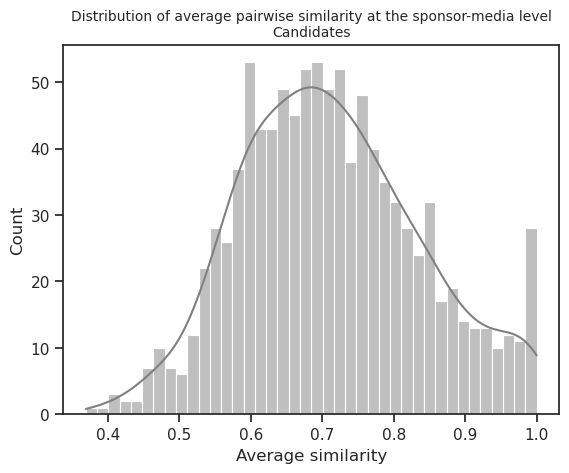

In [18]:
g = sns.histplot(df_cand.AverageSimilarity, kde=True, bins=40, color='gray')

g.set(title='Distribution of average pairwise similarity at the sponsor-media level\nCandidates', xlabel='Average similarity')
g.title.set_size(10)

In [19]:
df = df.merge(var[['pd_id', 'page_name', 'disclaimer']].drop_duplicates(), how='left', on='pd_id')

In [20]:
df.AverageSimilarity.mean()

0.8033912443313223

In [21]:
df_agg = df.groupby(['pd_id']).agg({'page_name': 'first', 'disclaimer': 'first', 'num_unique': 'sum'}).reset_index() 

In [22]:
df_agg.num_unique.mean()

13.32506762849414

In [23]:
df_agg.num_unique.median()

5.0

In [24]:
df_agg.sort_values(by='num_unique', ascending=False).head(40)

,pd_id,page_name,disclaimer,num_unique
935,pd-1155212867963791-2,AFP Action,"AMERICANS FOR PROSPERITY ACTION, INC.(AFP ACTION)",759
1954,pd-57495285387-2,Michael Bennet,Bennet for Colorado,758
2084,pd-747436915270894-3,Congressional Leadership Fund,CONGRESSIONAL LEADERSHIP FUND,455
732,pd-109111900634787-2,Reverend Raphael Warnock,WARNOCK FOR GEORGIA,446
1401,pd-197908256931216-7,Tim Ryan,TIM RYAN FOR OHIO,412
1517,pd-228754857151053-1,House Majority PAC,House Majority PAC,388
576,pd-106612915352436-1,Mary Peltola,Mary Peltola for Congress,330
1589,pd-261792742524-8,1199SEIU United Healthcare Workers East,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,272
1231,pd-163148530407080-2,Captain Mark Kelly,MARK KELLY FOR SENATE,229
1559,pd-245711905631405-6,Jeff Jackson,JEFF JACKSON FOR CONGRESS,221


(0.0, 100.0)

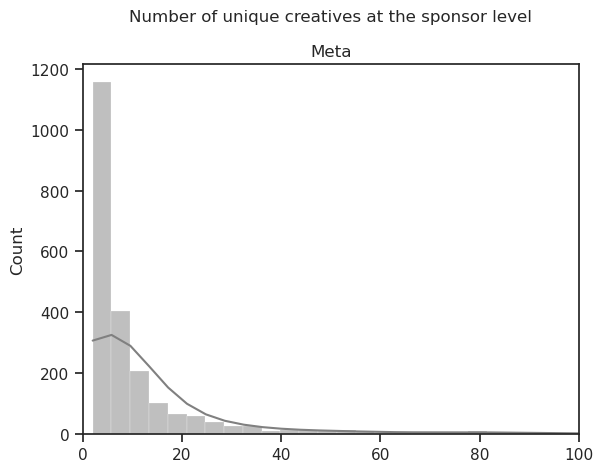

In [25]:
# aggregated num_unique histogram (sponsor level)
g = sns.histplot(df_agg.num_unique, kde=True, bins=200, color='gray')
g.set(title='Number of unique creatives at the sponsor level\n\nMeta', xlabel='')
plt.xlim((0, 100))

## Table to display in the draft

In [26]:
from IPython.display import display, HTML

In [27]:
df_cand = df[df.candidate == 1]
df_cand.shape

(1043, 18)

In [28]:
df_cand["sponsor"] = df_cand.disclaimer.str.upper()

/tmp/ipykernel_4762/2828349845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cand["sponsor"] = df_cand.disclaimer.str.upper()


In [29]:
def create_sophistication_index(input_df):
    max_ = input_df.num_unique.max()
    min_ = input_df.num_unique.min()
    input_df['num_unique_normalized'] = (input_df.num_unique - min_)/(max_ - min_)
    input_df['sophistication_index'] = input_df['num_unique_normalized'] * (1 - input_df.AverageSimilarity)
    return input_df

In [30]:
df_cand = create_sophistication_index(df_cand)

/tmp/ipykernel_4762/1499460830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['num_unique_normalized'] = (input_df.num_unique - min_)/(max_ - min_)
/tmp/ipykernel_4762/1499460830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['sophistication_index'] = input_df['num_unique_normalized'] * (1 - input_df.AverageSimilarity)


In [31]:
df_cand.drop_duplicates(inplace=True)

/tmp/ipykernel_4762/2166566794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cand.drop_duplicates(inplace=True)


In [32]:
df_cand['sponsor'] = df_cand.sponsor.str.title()
df_cand['wmp_media_type'] = df_cand.wmp_media_type.str.title()
df_cand['AverageSimilarity'] = df_cand.AverageSimilarity.round(3)
df_cand['sophistication_index'] = df_cand.sophistication_index.round(3)

/tmp/ipykernel_4762/1694024906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cand['sponsor'] = df_cand.sponsor.str.title()
/tmp/ipykernel_4762/1694024906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cand['wmp_media_type'] = df_cand.wmp_media_type.str.title()
/tmp/ipykernel_4762/1694024906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [34]:
cols2display = ['sponsor', 'sophistication_index', 'wmp_media_type', 'num_unique', 'AverageSimilarity']

rename_dict = {'sponsor': 'Sponsor', 'sophistication_index': 'Sophistication index',
              'wmp_media_type': 'Media type', 'num_unique': 'Unique creatives', 
               'AverageSimilarity': 'Average text similarity'}

display_df = df_cand[cols2display].sort_values(by='sophistication_index', ascending=False).drop_duplicates().head(20)

display_df.rename(columns=rename_dict, inplace=True)

display(HTML(display_df.to_html(index=False)))

Sponsor,Sophistication index,Media type,Unique creatives,Average text similarity
Warnock For Georgia,0.305,Image,273,0.695
Bennet For Colorado,0.237,Image,239,0.729
Warnock For Georgia,0.226,Video,152,0.591
Jeff Jackson For Congress,0.195,Image,166,0.679
Mark Kelly For Senate,0.169,Image,123,0.622
Schiff For Congress,0.166,Image,148,0.691
Tim Ryan For Ohio,0.165,Video,112,0.592
Jay Chen For Congress,0.143,Image,94,0.580
Marco Rubio For Senate,0.135,Image,118,0.686
Mark Kelly For Senate,0.133,"Image, Video",85,0.567
